In [65]:
from imutils import contours
from skimage import measure
import numpy as np
import argparse
import imutils
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

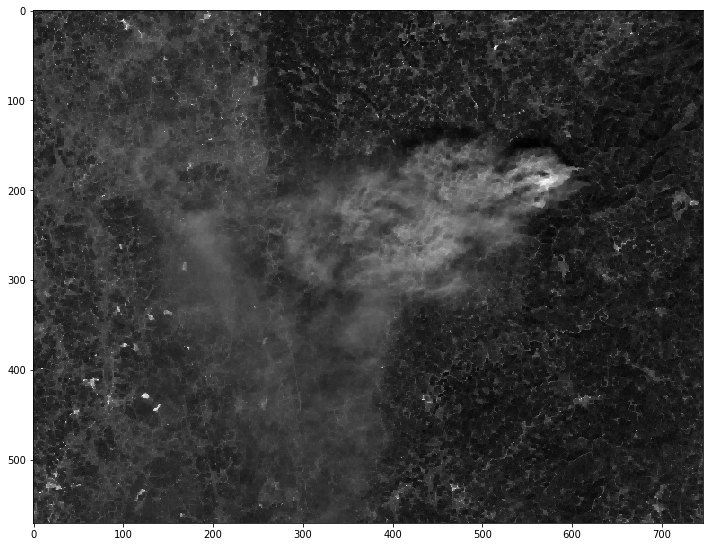

In [66]:
image = mpimg.imread('DATA/SatImg.jpg')
plt.figure(figsize=(12,24))
plt.imshow(image,cmap='gray')
plt.show()

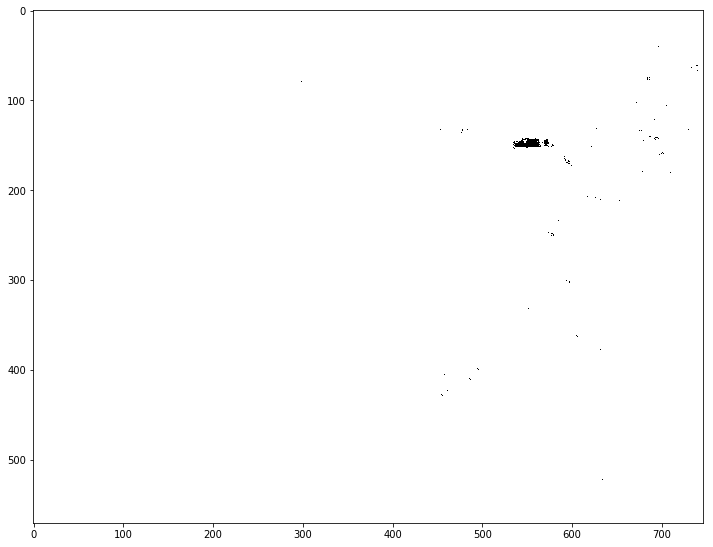

In [67]:
fire = image > 31
fire.astype(int)

plt.figure(figsize=(12,24))
plt.imshow(fire, cmap='gray')
plt.show()

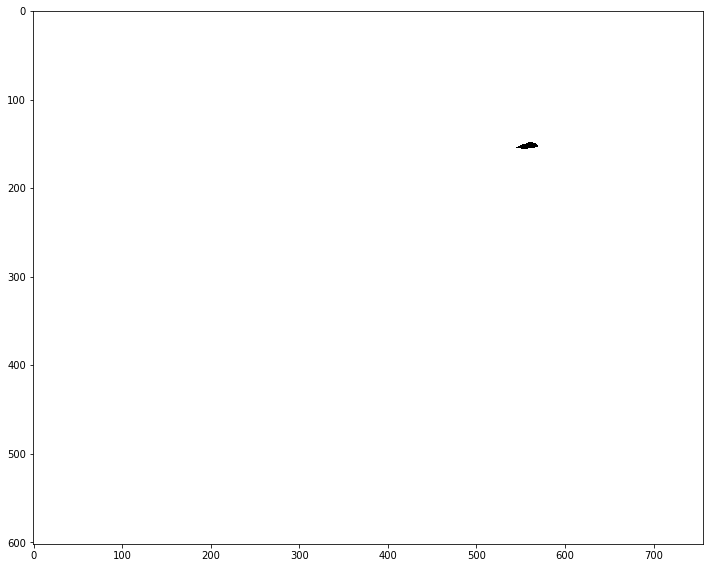

In [68]:
thresh = cv2.threshold(blurred, 30, 255, cv2.THRESH_BINARY)[1]
plt.figure(figsize=(12,24))
plt.imshow(thresh,cmap='gray')
plt.show()


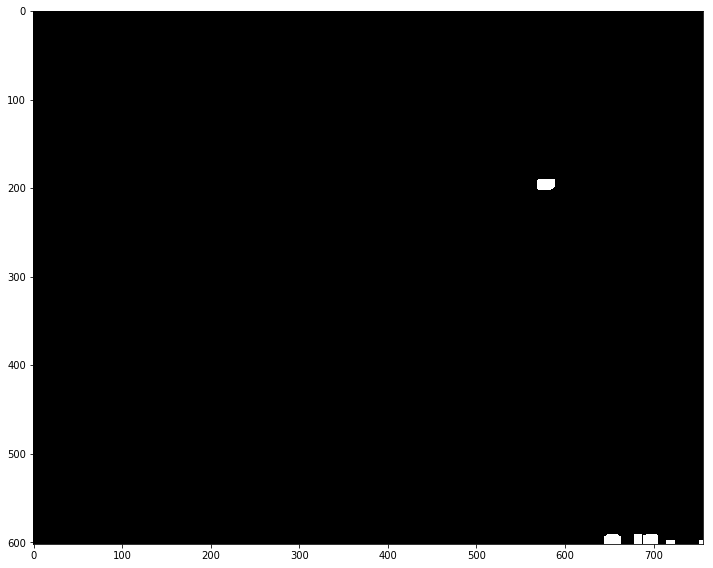

In [87]:
thresh = cv2.threshold(blurred, 210, 255, cv2.THRESH_BINARY)[1]

thresh = cv2.dilate(thresh, None, iterations=3)
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=3)

plt.figure(figsize=(12,24))
plt.imshow(thresh,cmap='gray')
plt.show()

Where are those 5 extra dots down below came from?! :(

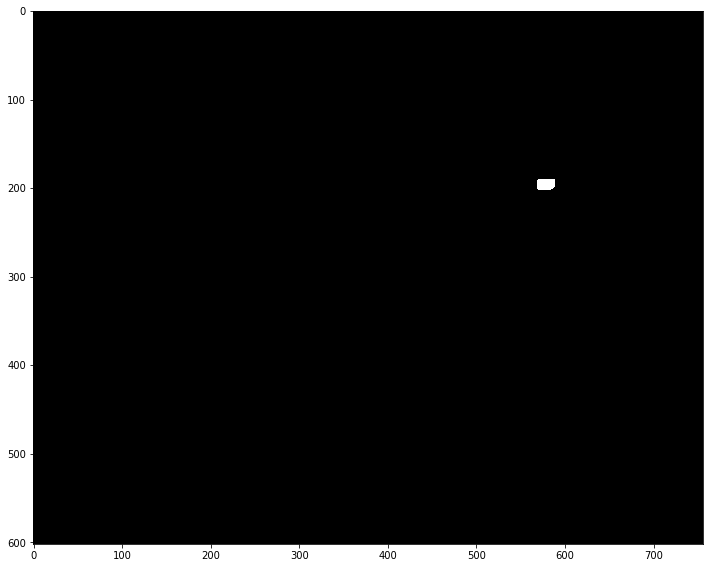

In [90]:
labels = measure.label(thresh, neighbors=8, background=0)
mask = np.zeros(thresh.shape, dtype="uint8")

# loop over the unique components
for label in np.unique(labels):
	# if this is the background label, ignore it
	if label == 0:
		continue
 
	# otherwise, construct the label mask and count the
	# number of pixels 
	labelMask = np.zeros(thresh.shape, dtype="uint8")
	labelMask[labels == label] = 255
	numPixels = cv2.countNonZero(labelMask)
 
	# if the number of pixels in the component is sufficiently
	# large, then add it to our mask of "large blobs"
	if numPixels > 200:
		mask = cv2.add(mask, labelMask)
        
plt.figure(figsize=(12,24))
plt.imshow(mask,cmap='gray')
plt.show()

They are gone! How? Only Miguel, Manuel and God knows.


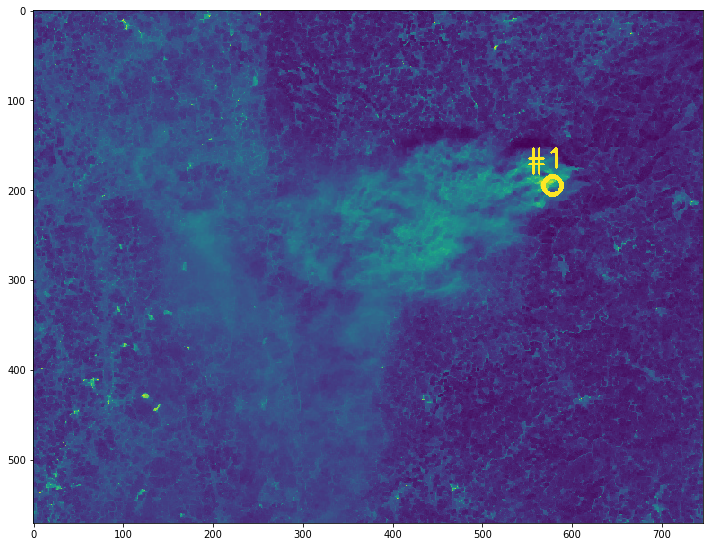

In [92]:
# reloading the image
image= mpimg.imread('DATA/SatImg.jpg')

# find the contours in the mask, then sort them from left to
# right
cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if imutils.is_cv2() else cnts[1]
cnts = contours.sort_contours(cnts)[0]
 
# loop over the contours
for (i, c) in enumerate(cnts):
	# draw the bright spot on the image
	(x, y, w, h) = cv2.boundingRect(c)
	((cX, cY), radius) = cv2.minEnclosingCircle(c)
	cv2.circle(image, (int(cX), int(cY)), int(radius),
		(255, 0, 0), 3)
	cv2.putText(image, "#{}".format(i + 1), (x-20, y - 15),
		cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
 
# show the output image
plt.figure(figsize=(12,24))
plt.imshow(image)
plt.show()

Everything works for know, but I have to study the last 2 cells for better understanding.